## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [207]:
X = np.linspace(0, 20)

In [208]:
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [209]:
y = -1*X + 2

In [210]:
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

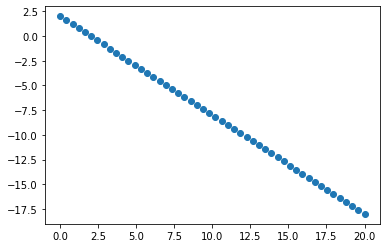

In [211]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [212]:
def hyp(X_in, theta_0_in, theta_1_in):
    h_x = []
    for i in range(len(X_in)):
        h_x.append(theta_0_in + theta_1_in *X_in[i])
    return h_x

def cost_fun(X_in, y_in, theta_0_in,  theta_1_in, h):
    res = sum((h - y_in)**2)
    res = res * (1/(2*len(X_in)))
    return res

def gradient(X_in, y_in, h_in):
    g_0 = (1/len(X_in)) * sum(h_in - y_in)
    g_1 = (1/len(X_in)) * sum((h_in - y_in) * X_in)
    return g_0, g_1

def update_param(t_0, t_1, alpha, g_in_0, g_in_1):
    t_0 = t_0 - (alpha * g_in_0)
    t_1 = t_1 - (alpha * g_in_1)
    return t_0, t_1

In [213]:
def BatchGD(X_in, y_in, alpha, it_max):
    theta_0, theta_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    
    h = hyp(X_in, theta_0, theta_1)
    hyp_arr.append(h)
    
    j = cost_fun(X_in, y_in, theta_0, theta_1, h)
    loss_arr.append(j)
    
    grad_0, grad_1 = gradient(X_in, y_in, h)
    
    theta_0, theta_1 = update_param(theta_0, theta_1, alpha, grad_0, grad_1)
    theta_0_arr.append(theta_0)
    theta_1_arr.append(theta_1)
    
    for i in range(it_max):
        h = hyp(X_in, theta_0, theta_1)
        hyp_arr.append(h)
        
        grad_0, grad_1 = gradient(X_in, y_in, h)
        
        theta_0, theta_1 = update_param(theta_0, theta_1, alpha, grad_0, grad_1)
        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        j = cost_fun(X_in, y_in, theta_0, theta_1, h)
        loss_arr.append(j)
        # stop condition: when cost is very small
        if j < 0.01:
            break
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1
    

In [214]:
alpha = 0.0001
max_it = 10000

In [215]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = BatchGD(X, y, alpha, max_it)   

In [216]:
r2_score(y, hyper_arr[-1])

0.9810704298546006

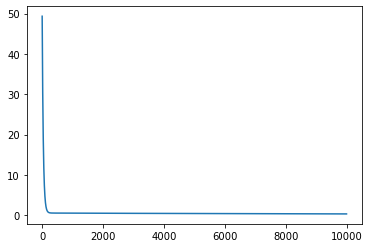

In [217]:
plt.plot(list(range(len(los_arr))),los_arr)

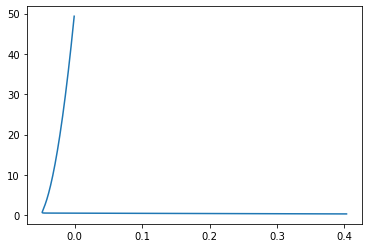

In [218]:
plt.plot(t_0_arr, los_arr)

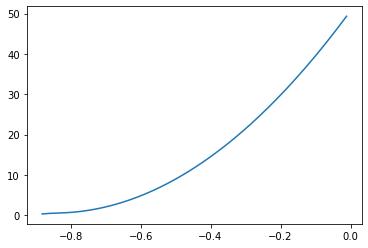

In [219]:
plt.plot(t_1_arr, los_arr)

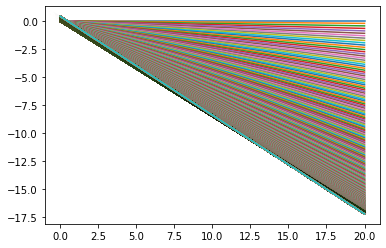

In [220]:
for i in range(max_it):    
    plt.plot(X, hyper_arr[i])

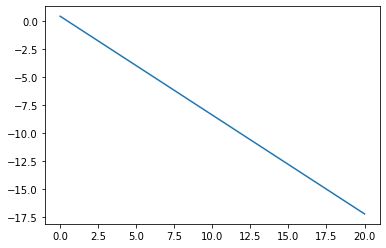

In [221]:
plt.plot(X,hyper_arr[-1])

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

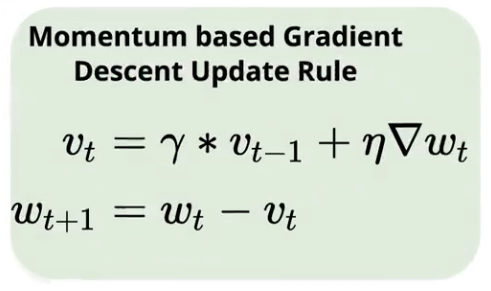

#### γ takes values between 0 and 1.
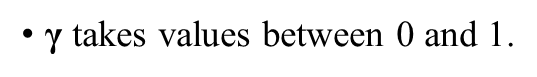

In [222]:
def hyp(X_in, theta_0_in, theta_1_in):
    h_x = []
    for i in range(len(X_in)):
        h_x.append(theta_0_in + theta_1_in *X_in[i])
    return h_x

def cost_fun(X_in, y_in, theta_0_in,  theta_1_in, h):
    res = sum((h - y_in)**2)
    res = res * (1/(2*len(X_in)))
    return res

def gradient(X_in, y_in, h_in):
    g_0 = (1/len(X_in)) * sum(h_in - y_in)
    g_1 = (1/len(X_in)) * sum((h_in - y_in) * X_in)
    return g_0, g_1

def update_v(v_in, alpha, gamma_in, grad):
    v_in = gamma_in * v_in + alpha * grad
    return v_in

# def update_param(t_0, alpha, g_in_0, v_in_0, gama):
#     t_0 = t_0 - v
#     #t_1 = t_1 - update_v(v, alpha, gama, g_in_1)
#     return t_0

In [223]:
def MomGD(X_in, y_in, alpha, gama, it_max):
    theta_0, theta_1 = 0, 0
    v_0, v_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    
    for i in range(it_max):
        h = hyp(X_in, theta_0, theta_1)
        hyp_arr.append(h)
        
        grad_0, grad_1 = gradient(X_in, y_in, h)
        
        v_0 = update_v(v_0, alpha, gama, grad_0)
        v_1 = update_v(v_1, alpha, gama, grad_1)
        
        theta_0 = theta_0 - v_0
        theta_1 = theta_1 - v_1
        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        j = cost_fun(X_in, y_in, theta_0, theta_1, h)
        loss_arr.append(j)
        # stop condition: when cost is very small
        if j < 0.01:
            break
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1
    

In [224]:
alpha = 0.0001
max_it = 10000
gamma = 0.5

In [226]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = MomGD(X, y, alpha, gamma ,max_it)   

In [227]:
r2_score(y, hyper_arr[-1])

0.9886577376558332

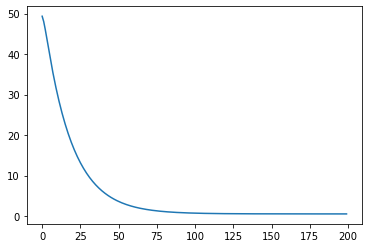

In [228]:
plt.plot(list(range(200)),los_arr[:200])

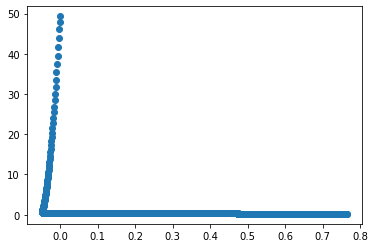

In [229]:
plt.scatter(t_0_arr, los_arr)

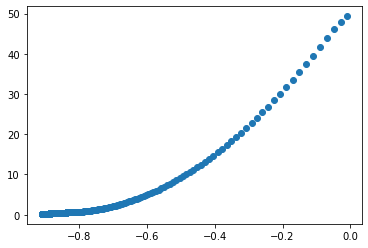

In [230]:
plt.scatter(t_1_arr, los_arr)

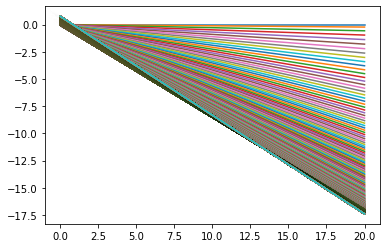

In [231]:
for i in range(max_it):    
    plt.plot(X, hyper_arr[i])

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [240]:
alpha = 0.0001
max_it = 10000
gamma = 0.9

In [241]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = MomGD(X, y, alpha, gamma ,max_it)   

In [242]:
r2_score(y, hyper_arr[-1])

0.9994237842365518

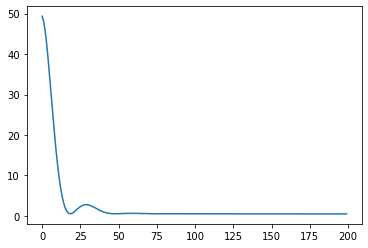

In [243]:
plt.plot(list(range(200)),los_arr[:200])

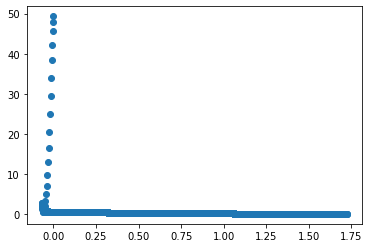

In [244]:
plt.scatter(t_0_arr, los_arr)

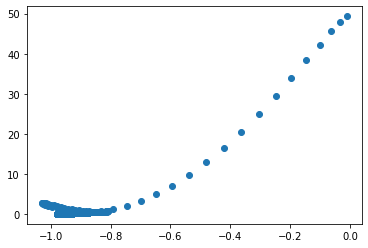

In [245]:
plt.scatter(t_1_arr, los_arr)

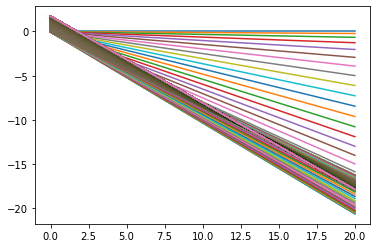

In [239]:
for i in range(len(hyper_arr)):    
    plt.plot(X, hyper_arr[i])

In [262]:
alpha = 0.0001
max_it = 10000
gamma = 0.1

In [263]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = MomGD(X, y, alpha, gamma ,max_it)   

In [264]:
r2_score(y, hyper_arr[-1])

0.9821168223508392

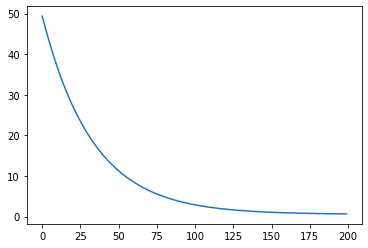

In [265]:
plt.plot(list(range(200)),los_arr[:200])

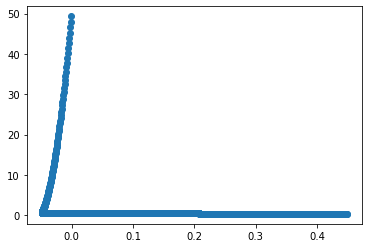

In [266]:
plt.scatter(t_0_arr, los_arr)

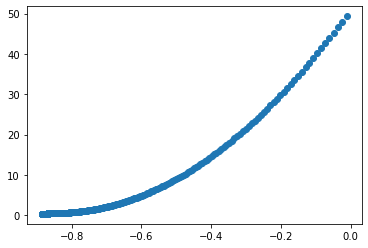

In [267]:
plt.scatter(t_1_arr, los_arr)

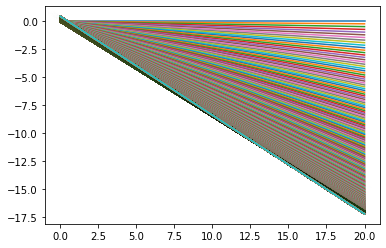

In [268]:
for i in range(len(hyper_arr)):    
    plt.plot(X, hyper_arr[i])

### as gamma increse it depends on more steps from history so converges faster 

In [269]:
alpha = 0.0001
max_it = 10000
gamma = 0

In [270]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = MomGD(X, y, alpha, gamma ,max_it)   

In [271]:
r2_score(y, hyper_arr[-1])

0.9810694600133457

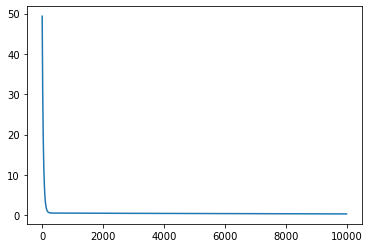

In [272]:
plt.plot(list(range(len(los_arr))),los_arr)

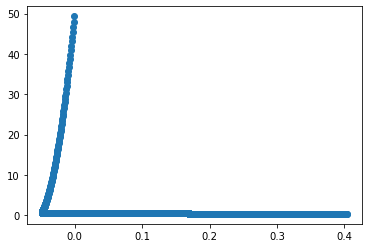

In [273]:
plt.scatter(t_0_arr, los_arr)

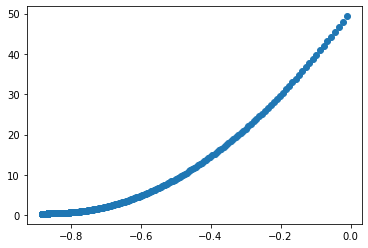

In [274]:
plt.scatter(t_1_arr, los_arr)

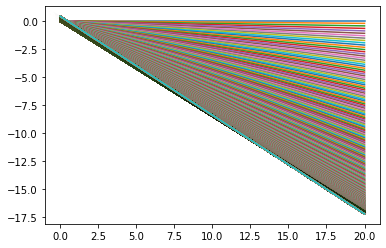

In [275]:
for i in range(len(hyper_arr)):    
    plt.plot(X, hyper_arr[i])

### Update your Batch GD for one variable  implementation to be NAG and check your results

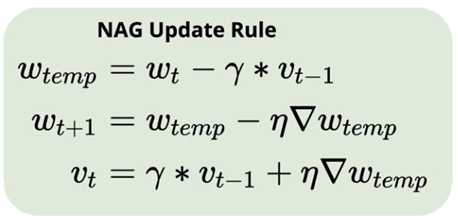

In [276]:
def hyp(X_in, theta_0_in, theta_1_in):
    h_x = []
    for i in range(len(X_in)):
        h_x.append(theta_0_in + theta_1_in *X_in[i])
    return h_x

def cost_fun(X_in, y_in, theta_0_in,  theta_1_in, h):
    res = sum((h - y_in)**2)
    res = res * (1/(2*len(X_in)))
    return res

def gradient(X_in, y_in, h_in):
    g_0 = (1/len(X_in)) * sum(h_in - y_in)
    g_1 = (1/len(X_in)) * sum((h_in - y_in) * X_in)
    return g_0, g_1

def update_v(v_in, alpha, gamma_in, grad):
    v_in = gamma_in * v_in + alpha * grad
    return v_in

# def update_param(t_0, alpha, g_in_0, v_in_0, gama):
#     t_0 = t_0 - v
#     #t_1 = t_1 - update_v(v, alpha, gama, g_in_1)
#     return t_0

In [277]:
def NAG(X_in, y_in, alpha, gama, it_max):
    theta_0, theta_1 = 0, 0
    theta_temp_0, theta_temp_1 = 0, 0
    v_0, v_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    
    for i in range(it_max):
        h = hyp(X_in, theta_0, theta_1)
        hyp_arr.append(h)
        
        theta_temp_0 = theta_0 - gama * v_0
        theta_temp_1 = theta_1 - gama * v_1
        
        grad_0, grad_1 = gradient(X_in, y_in, h)
        
        theta_0 = theta_temp_0 - alpha * grad_0
        theta_1 = theta_temp_1 - alpha * grad_1
        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        
        v_0 = update_v(v_0, alpha, gama, grad_0)
        v_1 = update_v(v_1, alpha, gama, grad_1)
        
        
        
        j = cost_fun(X_in, y_in, theta_0, theta_1, h)
        loss_arr.append(j)
        # stop condition: when cost is very small
        if j < 0.01:
            break
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1
    

In [278]:
alpha = 0.0001
max_it = 10000
gamma = 0.2

In [279]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = NAG(X, y, alpha, gamma ,max_it)   

In [280]:
r2_score(y, hyper_arr[-1])

0.9833449090733127

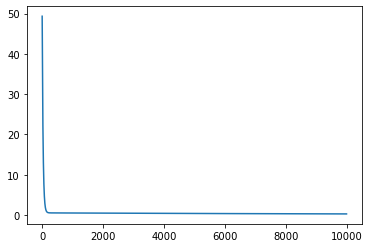

In [281]:
plt.plot(list(range(len(los_arr))),los_arr)

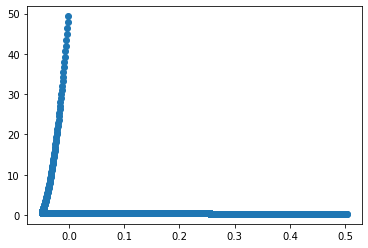

In [285]:
plt.scatter(t_0_arr, los_arr)

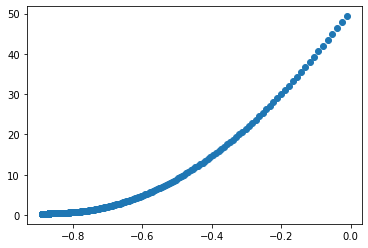

In [286]:
plt.scatter(t_1_arr, los_arr)

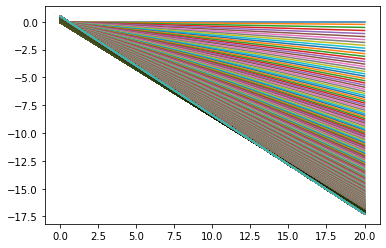

In [284]:
for i in range(len(hyper_arr)):    
    plt.plot(X, hyper_arr[i])

In [287]:
alpha = 0.0001
max_it = 10000
gamma = 0.9

In [288]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = NAG(X, y, alpha, gamma ,max_it)   

In [289]:
r2_score(y, hyper_arr[-1])

0.9994237842365518

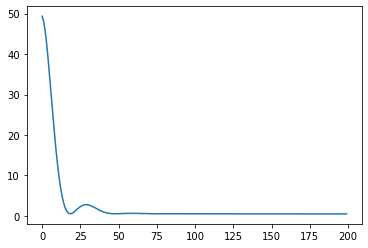

In [290]:
plt.plot(list(range(200)),los_arr[:200])

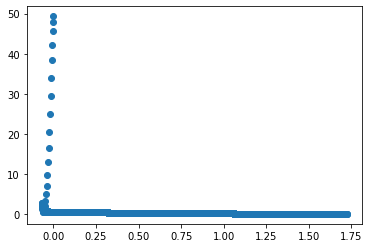

In [292]:
plt.scatter(t_0_arr, los_arr)

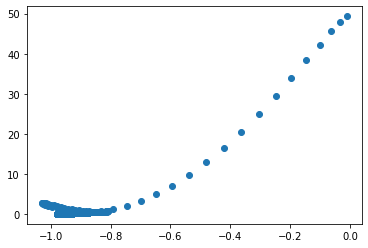

In [294]:
plt.scatter(t_1_arr, los_arr)

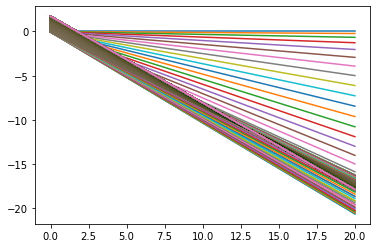

In [295]:
for i in range(len(hyper_arr)):    
    plt.plot(X, hyper_arr[i])

## Congratulations 
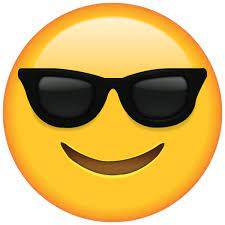

### Thank you 😊